In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# using 2020 survey data
df = pd.read_csv('/work/Survey Data/2020_brightside_data.csv')
df.head()

,RespondentID,newid,collectorid,location,date,nbr_relation,sense_commun,safe_violence,safe_covid,food_enough,...,bside_dur,bside_pre,bside_pre_other,bside_pre_muni,bside_pre_muni_other,surv_feedback,surv_who,surv_who_other,surv_hear,surv_hear_other
0,1.100050e+11,5085857,270167554,LONDONDERRY,8/11/2020 19:02,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,NaN,0.0,Burnaby,NaN,1.0,NaN,2.0,NaN
1,1.100050e+11,5135726,270167553,LIONS VIEW BLDG III,8/19/2020 13:37,2.0,2.0,2.0,3.0,1.0,...,3.0,0.0,Lived with my partner until the relationship e...,0.0,Pitt Meadows,I really would like that the building gets a b...,1.0,NaN,3.0,NaN
2,1.100050e+11,5213106,270167559,MOUNT PLEASANT,8/30/2020 20:26,NaN,2.0,NaN,0.0,NaN,...,4.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN
3,1.100050e+11,5213123,270167561,WALLACE WILSON,8/30/2020 20:33,2.0,3.0,3.0,3.0,2.0,...,2.0,7.0,NaN,0.0,North Vancouver,NaN,1.0,NaN,2.0,NaN
4,1.100050e+11,5213195,270167561,WALLACE WILSON,8/30/2020 20:50,3.0,3.0,2.0,3.0,1.0,...,3.0,2.0,NaN,0.0,Burnaby,I am very thankful for Brightside for making m...,1.0,NaN,1.0,NaN


In [2]:
df.info()
# only 223 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Columns: 237 entries, RespondentID to surv_hear_other
dtypes: float64(187), int64(2), object(48)
memory usage: 413.0+ KB


In [3]:
N = len(df)
perc = (df.isnull().sum()) / N *100
perc

RespondentID        0.000000
newid               0.000000
collectorid         0.000000
location            0.000000
date                0.000000
                     ...    
surv_feedback      65.022422
surv_who            1.793722
surv_who_other     95.515695
surv_hear           2.242152
surv_hear_other    98.206278
Length: 237, dtype: float64

In [28]:
# variables with more than 10% null values
perc_null = perc [ perc > 10].to_frame()
print(len(perc_null.index.tolist()))
perc_null_index = perc_null.index.tolist()
perc_null_index
# out of 237 columns, 138 columns had more than 25% null
# may be important questions, but non-contributory answers 
##  -> remove for this analysis
##  -> suggest review relevance to survey questionnaire
##  -> question: is questionnaire probably too long?

172


['safe_violence',
 'maint_suite',
 'maint_suite_txt',
 'maint_common',
 'maint_common_txt',
 'maint_amenity',
 'maint_amenity_txt',
 'maint_exterior',
 'maint_exterior_txt',
 'maint_security',
 'maint_security_txt',
 'maint_landscape',
 'maint_landscape_txt',
 'maint_other',
 'maint_other_txt',
 'house_stable_txt',
 'comm_email',
 'comm_email_adj',
 'comm_phone',
 'comm_phone_adj',
 'comm_note',
 'comm_note_adj',
 'comm_board',
 'comm_board_adj',
 'comm_mail',
 'comm_mail_adj',
 'comm_meet',
 'comm_meet_adj',
 'comm_news',
 'comm_news_adj',
 'depm_account',
 'depm_comdev',
 'depm_res',
 'depm_improve_txt',
 'food_worry_last_12',
 'food_health_last_12',
 'food_few_last_12',
 'food_skip_last_12',
 'food_less_last_12',
 'food_empty_last_12',
 'food_hunger_last_12',
 'food_day_last_12',
 'support_medication',
 'support_clean',
 'support_maintenance',
 'support_personal',
 'support_meal',
 'support_grocery',
 'support_na',
 'support_other',
 'support_other_txt',
 'htlh_well_txt',
 'home_dnu

In [29]:
# removing variables with >25% missing
df2 = df.drop(perc_null_index, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RespondentID         223 non-null    float64
 1   newid                223 non-null    int64  
 2   collectorid          223 non-null    int64  
 3   location             223 non-null    object 
 4   date                 223 non-null    object 
 5   nbr_relation         211 non-null    float64
 6   sense_commun         202 non-null    float64
 7   safe_covid           206 non-null    float64
 8   food_enough          212 non-null    float64
 9   food_access          207 non-null    float64
 10  food_variety         208 non-null    float64
 11  food_afford          206 non-null    float64
 12  food_worry           207 non-null    float64
 13  covid_info_satis     221 non-null    float64
 14  covid_brief_satis    208 non-null    float64
 15  house_stable         214 non-null    flo

In [30]:
df2.drop(['RespondentID', 'collectorid', 'newid', 'date'], axis = 1, inplace=True)

In [31]:
# initial exploration at survey2020 showed blanks at id_***
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
perc2 = ((df2.isnull().sum() / len(df2))*100).round(0)
null2 = perc2 [perc2 > 10]
null2

id_senior          26.0
id_ya              96.0
id_indig           95.0
id_dis             75.0
id_substance       98.0
id_addict          97.0
id_mentalhealth    89.0
id_flee_viol       97.0
id_vet             96.0
id_lgbtq           93.0
id_racialized      96.0
id_recent_Imm      96.0
id_homeless        93.0
id_na              90.0
dtype: float64

In [32]:
null_index2 = null2.index.tolist()
df3 = df2.drop(null_index2, axis = 1)
df3.head(3)

,location,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
0,LONDONDERRY,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,3.0,3.0,2.0,5.0,1.0,2.0,2.0,0.0,1.0,2.0
1,LIONS VIEW BLDG III,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,1.0,3.0
2,MOUNT PLEASANT,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,...,3.0,3.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,2.0


In [33]:
df3.info()
# categorical: location
# variables checked: all discrete, even age, 
#   ranges 0-10, inconsistently, including 'prefer not to answer'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             223 non-null    object 
 1   nbr_relation         211 non-null    float64
 2   sense_commun         202 non-null    float64
 3   safe_covid           206 non-null    float64
 4   food_enough          212 non-null    float64
 5   food_access          207 non-null    float64
 6   food_variety         208 non-null    float64
 7   food_afford          206 non-null    float64
 8   food_worry           207 non-null    float64
 9   covid_info_satis     221 non-null    float64
 10  covid_brief_satis    208 non-null    float64
 11  house_stable         214 non-null    float64
 12  apprch_bside         216 non-null    float64
 13  comm_reg             208 non-null    float64
 14  comm_news_satisf     213 non-null    float64
 15  depm_admin           205 non-null    flo

In [34]:
for key in df3.drop(['location','age'], axis=1).keys():
    print(key, ':', df3[key].unique())

nbr_relation : [ 2. nan  3.  1.  0.]
sense_commun : [ 2.  3.  1.  0. nan]
safe_covid : [ 2.  3.  0.  1. nan]
food_enough : [ 1. nan  2.  3.  0.  5.  4.]
food_access : [ 1. nan  2.  3.  4.  0.  5.]
food_variety : [ 1. nan  3.  2.  4.  0.  5.]
food_afford : [ 1. nan  4.  2.  3.  0.  5.]
food_worry : [ 1. nan  2.  3.  0.  4.  5.]
covid_info_satis : [ 2.  1.  3.  4. nan  5.]
covid_brief_satis : [ 2.  1.  3. nan  4.  5.]
house_stable : [ 3.  1. nan  2.  4.  5.]
apprch_bside : [ 2.  1.  3. nan  4.  5.]
comm_reg : [ 1.  2.  3. nan]
comm_news_satisf : [ 3.  1.  2. nan  5.  4.]
depm_admin : [ 3.  5.  4.  1. nan  0.  2.]
depm_oper : [ 2.  5.  1.  4. nan  3.  0.]
food_access_last_12 : [ 1. nan  2.  3.  6.  5.  4.]
hlth_phys : [ 4.  1.  2.  3.  5. nan  6.]
hlth_mental : [ 4.  1.  5.  3.  2.  6. nan]
hlth_happy : [ 3.  2. nan  1.  4.  6.  5.]
hlth_well : [ 0.  1. nan  2.]
time_nbr : [ 1.  0.  2. nan]
nbr_relation_better : [ 1.  3. nan  2.]
chat_often : [ 2.  5.  1.  3.  6.  4. nan]
num_close_friend

In [35]:
pd.set_option('display.max_rows', None)

((df3.isnull().sum() / len(df3) ) *100).round()

location                0.0
nbr_relation            5.0
sense_commun            9.0
safe_covid              8.0
food_enough             5.0
food_access             7.0
food_variety            7.0
food_afford             8.0
food_worry              7.0
covid_info_satis        1.0
covid_brief_satis       7.0
house_stable            4.0
apprch_bside            3.0
comm_reg                7.0
comm_news_satisf        4.0
depm_admin              8.0
depm_oper              10.0
food_access_last_12     2.0
hlth_phys               2.0
hlth_mental             0.0
hlth_happy              1.0
hlth_well               6.0
time_nbr                5.0
nbr_relation_better     5.0
chat_often              4.0
num_close_friends       3.0
unsafe_area             7.0
rlns_care               9.0
rlns_welcome            9.0
rlns_space              9.0
rlns_safe               6.0
rlns_safe_obj          10.0
age                     3.0
gender                  4.0
household               4.0
num_child           

In [38]:
pd.options.display.max_columns = 50
df3.head()

,location,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,house_stable,apprch_bside,comm_reg,comm_news_satisf,depm_admin,depm_oper,food_access_last_12,hlth_phys,hlth_mental,hlth_happy,hlth_well,time_nbr,nbr_relation_better,chat_often,num_close_friends,unsafe_area,rlns_care,rlns_welcome,rlns_space,rlns_safe,rlns_safe_obj,age,gender,household,num_child,rln_status,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
0,LONDONDERRY,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,4.0,4.0,3.0,0.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,3.0,4.0,3.0,8.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,5.0,1.0,2.0,2.0,0.0,1.0,2.0
1,LIONS VIEW BLDG III,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,4.0,1.0,3.0,5.0,3.0,5.0,5.0,8.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,1.0,3.0
2,MOUNT PLEASANT,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,2.0,2.0,5.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,2.0,NaN,4.0,4.0,0.0,4.0,NaN,9.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,2.0
3,WALLACE WILSON,2.0,3.0,3.0,2.0,1.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,4.0,2.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,4.0,2.0,2.0,7.0,2.0,1.0,1.0,3.0,4.0,3.0,2.0,6.0,0.0,2.0,7.0,0.0,1.0,2.0
4,WALLACE WILSON,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0,0.0,3.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,8.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0


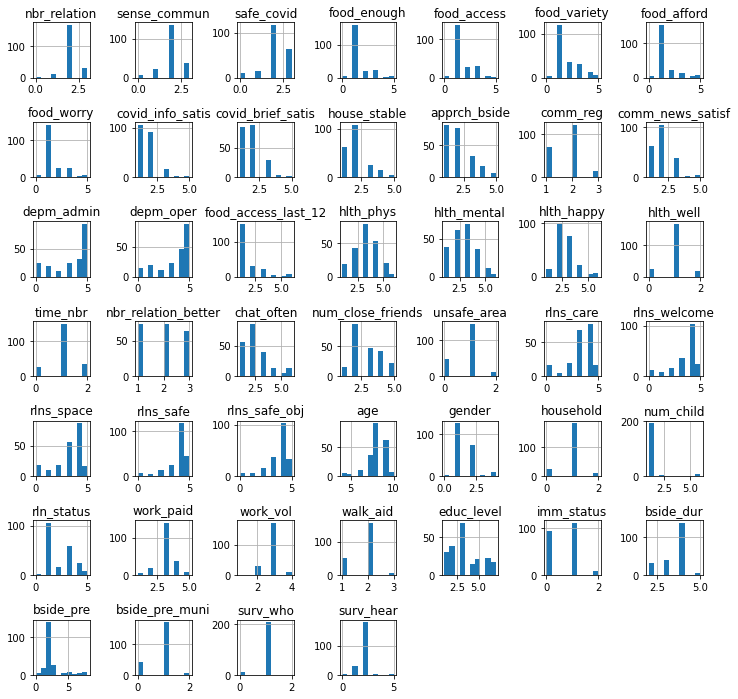

In [39]:
df3.hist(figsize = (12,12))
plt.subplots_adjust(hspace=0.8, wspace = 0.8);
# -> replace NA with mode

In [50]:
df4 = df3.copy()
for x in df4:
    #df4[x].fillna(df3[x].agg('mode'), inplace=True) 
    #df4[x] = df4[x].fillna(df3[x].agg('mode')) 
    #df4.replace({np.nan: df4.agg('mode')})

# not effective -> find another way

In [52]:
df4.isnull().sum()

location                0
nbr_relation           12
sense_commun           21
safe_covid             17
food_enough            11
food_access            16
food_variety           15
food_afford            17
food_worry             16
covid_info_satis        2
covid_brief_satis      15
house_stable            9
apprch_bside            7
comm_reg               15
comm_news_satisf       10
depm_admin             18
depm_oper              22
food_access_last_12     4
hlth_phys               4
hlth_mental             1
hlth_happy              2
hlth_well              13
time_nbr               11
nbr_relation_better    12
chat_often              8
num_close_friends       7
unsafe_area            15
rlns_care              20
rlns_welcome           21
rlns_space             21
rlns_safe              13
rlns_safe_obj          22
age                     7
gender                  9
household               9
num_child              18
rln_status              6
work_paid               9
work_vol    

In [59]:
#df4['nbr_relation'].replace({np.nan: df4['nbr_relation'].mode()},inplace=True)
# not effective -> another way

df4.nbr_relation.replace(np.nan, 2.0, inplace=True)
# manual replacement accepted

In [68]:
df4.sense_commun.replace(np.nan, 2.0, inplace=True)
df4.safe_covid.replace(np.nan, 2.0, inplace=True)
df4.food_enough.replace(np.nan, 1.0, inplace=True)
df4.food_access.replace(np.nan, 1.0, inplace=True)
df4.food_variety.replace(np.nan, 1.0, inplace=True)
df4.food_afford.replace(np.nan, 1.0, inplace=True)
df4.food_worry.replace(np.nan, 1.0, inplace=True)

In [80]:
df4.covid_info_satis.replace(np.nan, 1.0, inplace=True)
df4.covid_brief_satis.replace(np.nan, 2.0, inplace=True)
df4.house_stable.replace(np.nan, 2.0, inplace=True)
df4.apprch_bside.replace(np.nan, 1.0, inplace=True)
df4.comm_reg.replace(np.nan, 2.0, inplace=True)
df4.comm_news_satisf.replace(np.nan, 2.0, inplace=True)
df4.depm_admin.replace(np.nan, 5.0, inplace=True)
df4.depm_oper.replace(np.nan, 5.0, inplace=True)

In [91]:
df4.food_access_last_12.replace(np.nan, 1.0, inplace=True)
df4.hlth_phys.replace(np.nan, 3.0, inplace=True)
df4.hlth_mental.replace(np.nan, 3.0, inplace=True)
df4.hlth_happy.replace(np.nan, 2.0, inplace=True)
df4.hlth_well.replace(np.nan, 1.0, inplace=True)
df4.time_nbr.replace(np.nan, 1.0, inplace=True)
df4.nbr_relation_better.replace(np.nan, 2.0, inplace=True)
df4.chat_often.replace(np.nan, 2.0, inplace=True)
df4.num_close_friends.replace(np.nan, 2.0, inplace=True)

In [104]:
df4.unsafe_area.replace(np.nan, 1.0, inplace=True)
df4.rlns_care.replace(np.nan, 4.0, inplace=True)
df4.rlns_welcome.replace(np.nan, 4.0, inplace=True)
df4.rlns_space.replace(np.nan, 4.0, inplace=True)
df4.rlns_safe.replace(np.nan, 4.0, inplace=True)
df4.rlns_safe_obj.replace(np.nan, 4.0, inplace=True)
df4.age.replace(np.nan, 8.0, inplace=True)
df4.gender.replace(np.nan, 1.0, inplace=True)
df4.household.replace(np.nan, 1.0, inplace=True)
df4.num_child.replace(np.nan, 1.0, inplace=True)

In [53]:
df4.isnull().columns

Index(['location', 'nbr_relation', 'sense_commun', 'safe_covid', 'food_enough',
       'food_access', 'food_variety', 'food_afford', 'food_worry',
       'covid_info_satis', 'covid_brief_satis', 'house_stable', 'apprch_bside',
       'comm_reg', 'comm_news_satisf', 'depm_admin', 'depm_oper',
       'food_access_last_12', 'hlth_phys', 'hlth_mental', 'hlth_happy',
       'hlth_well', 'time_nbr', 'nbr_relation_better', 'chat_often',
       'num_close_friends', 'unsafe_area', 'rlns_care', 'rlns_welcome',
       'rlns_space', 'rlns_safe', 'rlns_safe_obj', 'age', 'gender',
       'household', 'num_child', 'rln_status', 'work_paid', 'work_vol',
       'walk_aid', 'educ_level', 'imm_status', 'bside_dur', 'bside_pre',
       'bside_pre_muni', 'surv_who', 'surv_hear'],
      dtype='object')

In [116]:
df4.surv_hear.mode()

0    2.0
dtype: float64

In [117]:
df4.rln_status.replace(np.nan, 1.0, inplace=True)
df4.work_paid.replace(np.nan, 3.0, inplace=True)
df4.work_vol.replace(np.nan, 3.0, inplace=True)
df4.walk_aid.replace(np.nan, 2.0, inplace=True)
df4.educ_level.replace(np.nan, 3.0, inplace=True)
df4.imm_status.replace(np.nan, 1.0, inplace=True)
df4.bside_dur.replace(np.nan, 4.0, inplace=True)
df4.bside_pre.replace(np.nan, 2.0, inplace=True)
df4.bside_pre_muni.replace(np.nan, 1.0, inplace=True)
df4.surv_who.replace(np.nan, 1.0, inplace=True)
df4.surv_hear.replace(np.nan, 2.0, inplace=True)

In [118]:
df4.isnull().sum()

location               0
nbr_relation           0
sense_commun           0
safe_covid             0
food_enough            0
food_access            0
food_variety           0
food_afford            0
food_worry             0
covid_info_satis       0
covid_brief_satis      0
house_stable           0
apprch_bside           0
comm_reg               0
comm_news_satisf       0
depm_admin             0
depm_oper              0
food_access_last_12    0
hlth_phys              0
hlth_mental            0
hlth_happy             0
hlth_well              0
time_nbr               0
nbr_relation_better    0
chat_often             0
num_close_friends      0
unsafe_area            0
rlns_care              0
rlns_welcome           0
rlns_space             0
rlns_safe              0
rlns_safe_obj          0
age                    0
gender                 0
household              0
num_child              0
rln_status             0
work_paid              0
work_vol               0
walk_aid               0


In [120]:
df4.sample(10)

,location,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,house_stable,apprch_bside,comm_reg,comm_news_satisf,depm_admin,depm_oper,food_access_last_12,hlth_phys,hlth_mental,hlth_happy,hlth_well,time_nbr,nbr_relation_better,chat_often,num_close_friends,unsafe_area,rlns_care,rlns_welcome,rlns_space,rlns_safe,rlns_safe_obj,age,gender,household,num_child,rln_status,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
98,LIONS VIEW BLDG I,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,1.0,3.0,2.0,5.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,3.0,4.0,4.0,8.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,5.0,0.0,4.0,2.0,1.0,1.0,2.0
222,KINGS DAUGHTERS,2.0,2.0,2.0,3.0,5.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,2.0,5.0,2.0,3.0,3.0,5.0,2.0,3.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,1.0,2.0,2.0,9.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,6.0,2.0,4.0,5.0,2.0,1.0,2.0
8,SOROPTIMIST LIONS,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,8.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,5.0,0.0,4.0,2.0,1.0,1.0,2.0
206,COLLINGWOOD TOWER,2.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,5.0,5.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,9.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0
15,MACLEOD MANOR,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,5.0,6.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,5.0,1.0,0.0,4.0,0.0,4.0,4.0,8.0,2.0,0.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0
190,MOUNT PLEASANT,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,3.0,5.0,4.0,5.0,4.0,9.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
85,BURRARD MANOR,2.0,2.0,3.0,1.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,5.0,4.0,4.0,5.0,5.0,9.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,2.0
184,MOUNT PLEASANT,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,5.0,5.0,5.0,3.0,5.0,6.0,1.0,1.0,2.0,3.0,3.0,0.0,4.0,4.0,4.0,2.0,4.0,6.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0
100,BRIDGEVIEW PLACE,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,4.0,1.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,3.0,4.0,3.0,4.0,4.0,9.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
94,SOROPTIMIST LIONS,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,5.0,2.0,5.0,4.0,4.0,1.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,0.0,4.0,1.0,1.0,2.0,2.0,7.0,4.0,1.0,1.0,1.0,4.0,2.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec36858b-3dda-48ee-b585-815a2bd46f62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>